# Introduction

使用 support vector machines (SVMs) 来构建一个广告分类器

# Support Vector Machines

- 在前半部分，将会直观了解SVMs的工作原理已经如何在SVMs上使用高斯内核(Gaussian kernel)
- 在后半部分，将会使用SVMs构建一个垃圾广告分类器

### Example Dataset 1

In [1]:
from utils import *

In [2]:
raw_data = load_data('data/ex6data1.mat')
raw_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']
data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [4]:
data.describe()

,X1,X2,y
count,51.000000,51.000000,51.000000
mean,2.268780,3.132512,0.411765
std,0.928531,0.753256,0.497050
min,0.086405,1.617700,0.000000
25%,1.572550,2.636000,0.000000
50%,2.275300,3.070900,0.000000
75%,2.955050,3.531400,1.000000
max,4.015000,4.616200,1.000000


### Visualizing data
使用散点图进行表示，去找个i部分类标签由符号表示(+表示正类，o表示负类)

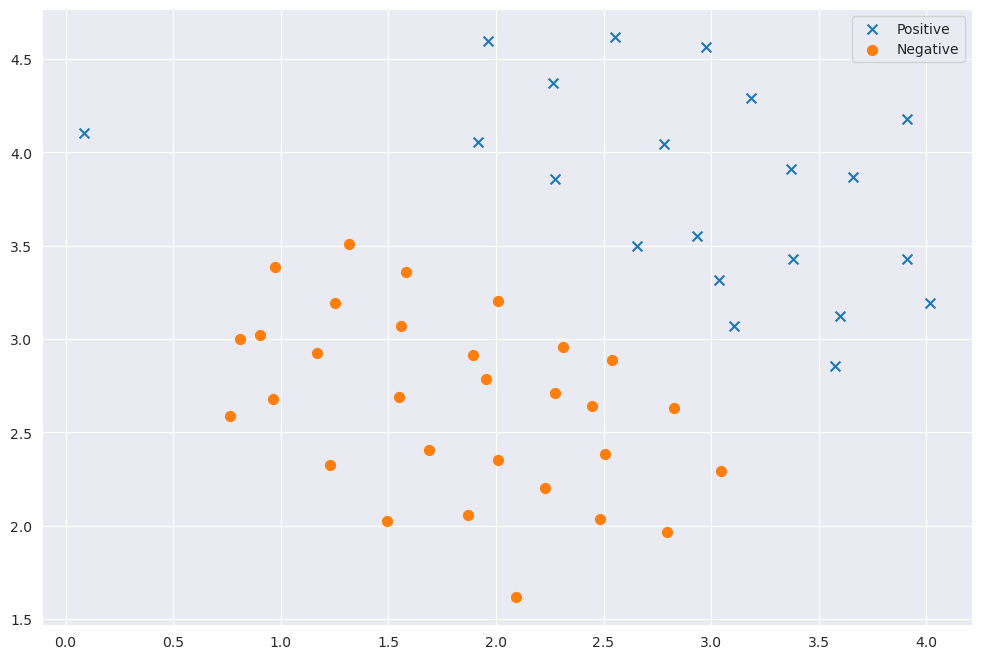

In [5]:
positive = data[data['y'] == 1]
negative = data[data['y'] == 0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()
plt.show()

请注意，还有一个异常的正例在其他样本之外on
 the far left at about (0141)。

这些类仍然是线性分离的，但它非常紧凑。 我们要训练线性支持向量机来学习类边界。

### Try C = 1

In [6]:
svc1 = sklearn.svm.SVC(C=1, kernel='linear', max_iter=20000)

In [7]:
x_train = data[['X1','X2']]
y_train = data['y']
svc1.fit(x_train, y_train)
svc1.score(x_train, y_train)

0.9803921568627451

#### Decision boundary

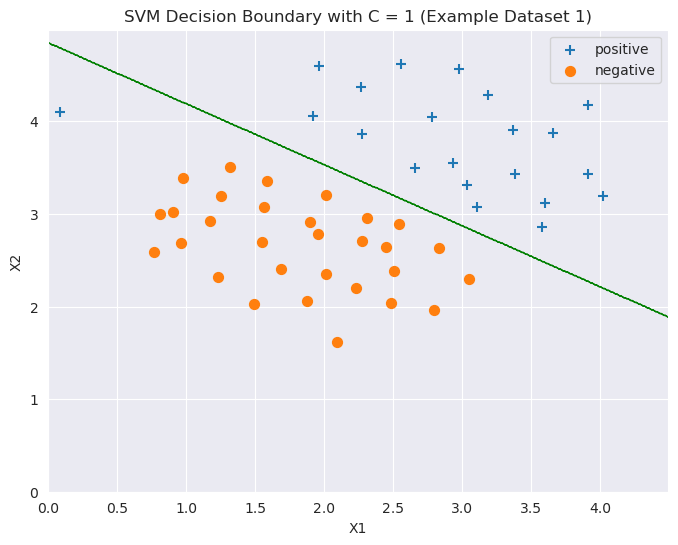

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
positive = data[data.y == 1]
negative = data[data.y == 0]

ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('SVM Decision Boundary with C = 1 (Example Dataset 1)')

# 决策边界, 使用等高线表示
x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(0, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2)

# 将网格点转为 DataFrame，带上列名
grid_points = pd.DataFrame({'X1': x1.ravel(), 'X2': x2.ravel()})

# 预测
y_pred = svc1.predict(grid_points)

# 将预测结果恢复为与网格形状一致
y_pred = y_pred.reshape(x1.shape)

plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

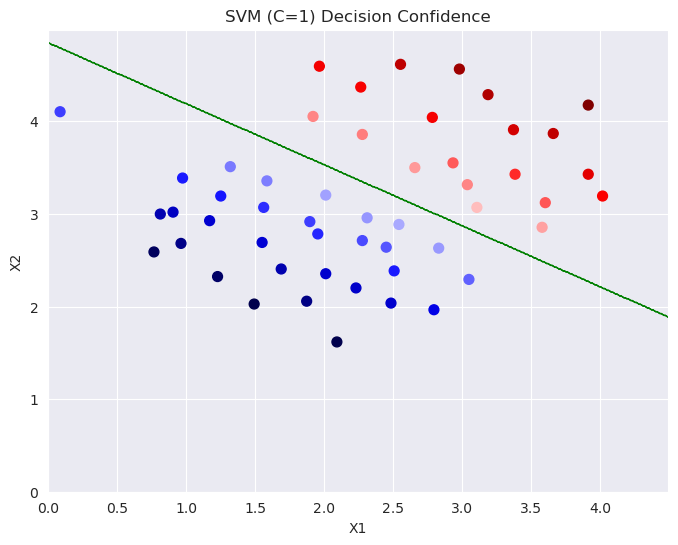

In [9]:
# The confidence score for a sample is the signed distance of that sample to the hyperplane.
data['SVM1 Confidence'] = svc1.decision_function(x_train)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='seismic')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('SVM (C=1) Decision Confidence')

# Decision Boundary
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()


### Try C = 400

C对应正则化的$\lambda$，$C = \frac{1}{\lambda}$，C越大越容易过拟合。
图像中最左侧的点被划分到右侧。


In [10]:
svc2 = sklearn.svm.SVC(C=400, kernel='linear', max_iter=10000)
svc2.fit(x_train, y_train)
svc2.score(x_train, y_train)

1.0

#### Decision Boundary

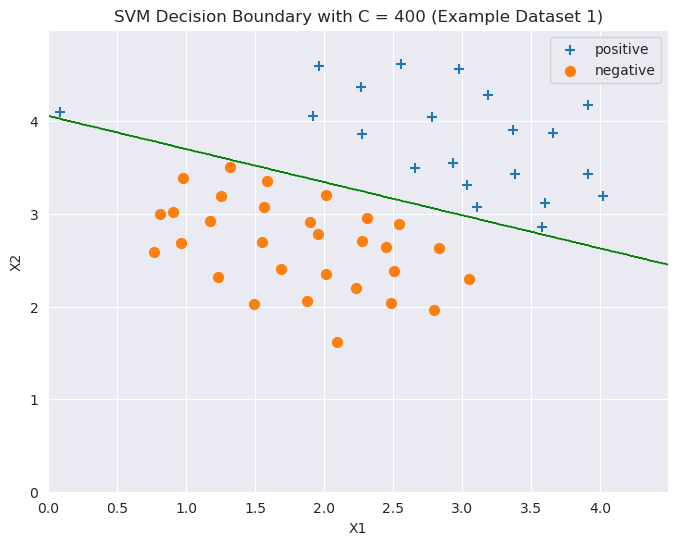

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
positive = data[data.y == 1]
negative = data[data.y == 0]

ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('SVM Decision Boundary with C = 400 (Example Dataset 1)')

# 决策边界, 使用等高线表示
x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(0, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2)

# 将网格点转为 DataFrame，带上列名
grid_points = pd.DataFrame({'X1': x1.ravel(), 'X2': x2.ravel()})

# 预测
y_pred = svc2.predict(grid_points)

# 将预测结果恢复为与网格形状一致
y_pred = y_pred.reshape(x1.shape)

plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

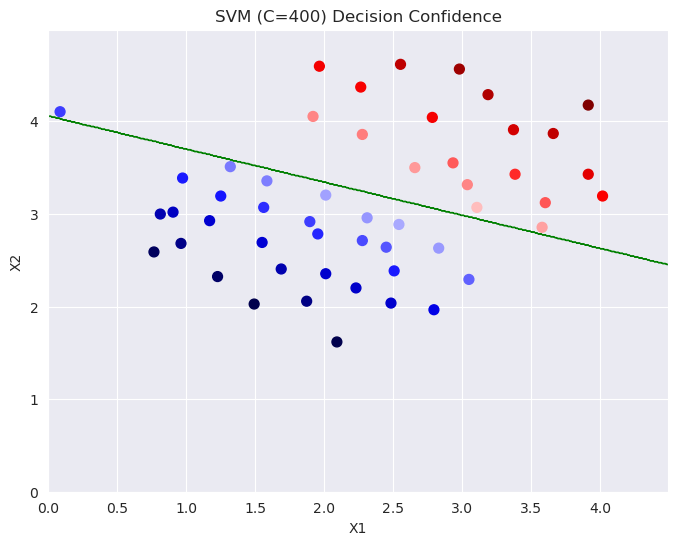

In [12]:
# The confidence score for a sample is the signed distance of that sample to the hyperplane.
data['SVM2 Confidence'] = svc1.decision_function(x_train)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM2 Confidence'], cmap='seismic')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('SVM (C=400) Decision Confidence')

# Decision Boundary
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()


In [13]:
data.head()

,X1,X2,y,SVM1 Confidence,SVM2 Confidence
0,1.9643,4.5957,1,2.222371,2.222371
1,2.2753,3.8589,1,1.087689,1.087689
2,2.9781,4.5651,1,3.583676,3.583676
3,2.9320,3.5519,1,1.356656,1.356656
4,3.5772,2.8560,1,0.779535,0.779535


In [14]:
# 清空所有的变量
%reset -f

from utils import *

# SVM with Gaussian Kernels

## Gaussian Kernel

要使用SVM确定非线性决策边界，我们需要首先使用高斯内核。

\begin{align*}
K_{\text{gaussian}}(x^{(i)}, x^{(j)})
  &= \exp\left( -\frac{\|x^{(i)} - x^{(j)}\|^2}{2\sigma^2} \right) \\
  &= \exp\left( -\frac{\sum\limits_{k=1}^n (x_k^{(i)} - x_k^{(j)})^2}{2\sigma^2} \right)
\end{align*}

In [15]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-np.sum((x1 - x2) ** 2) / (2 * sigma**2))

In [16]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

np.float64(0.32465246735834974)

In [17]:
raw_data = load_data('data/ex6data2.mat')
raw_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [18]:
raw_data['X']

array([[0.107143 , 0.60307  ],
       [0.093318 , 0.649854 ],
       [0.0979263, 0.705409 ],
       ...,
       [0.975806 , 0.439474 ],
       [0.989631 , 0.425439 ],
       [0.996544 , 0.414912 ]])

In [19]:
raw_data['y']

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [20]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']
data.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [21]:
data.describe()

,X1,X2,y
count,863.000000,863.000000,863.000000
mean,0.503414,0.694304,0.556199
std,0.254967,0.158884,0.497120
min,0.044931,0.402632,0.000000
25%,0.292627,0.557018,0.000000
50%,0.512673,0.693713,1.000000
75%,0.699309,0.830409,1.000000
max,0.998848,0.988596,1.000000


## Visualizing Data

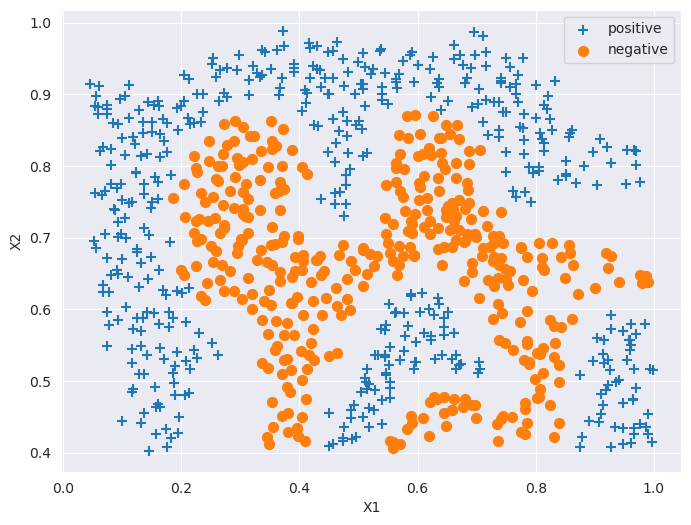

In [22]:
positive = data[data.y == 1]
negative = data[data.y == 0]

fix, ax = plt.subplots(figsize=(8, 6))
ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

In [23]:
'''
    gamma:高斯核（rbf）的参数，控制单个样本对模型的影响范围
    gamma值越大,决策边界更复杂（可能过拟合）。
'''
svc = sklearn.svm.SVC(C=100, gamma=10, probability=True)

In [24]:
x_train = data[['X1','X2']]
y_train = data['y']
svc.fit(x_train, y_train)
svc.score(x_train, y_train)

0.9698725376593279

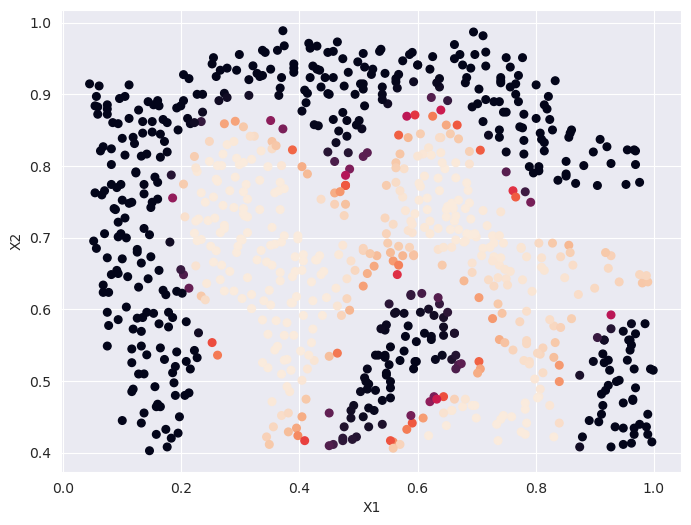

In [25]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'])
plt.show()

## Sklearn.svm use gaussian kernel
[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

\begin{align*}
K_{\text{gaussian}}(x^{(i)}, x^{(j)}) = \exp\left(-\frac{\|x^{(i)} - x^{(j)}\|^2}{2\sigma^2}\right) = \exp\left(-\frac{\sum\limits_{k=1}^{n}(x^{(i)}_{k} - x^{(j)}_{k})^2}{2\sigma^2}\right)
\end{align*}

### Try gamma = 1
$\gamma$ 和 $\sigma$ 成反比， $gamma\searrow,那么sigma\nearrow$，gaussian kernel越`“胖”`，模型越容易`under fitting`

In [26]:
svc1 = sklearn.svm.SVC(C=100, kernel='rbf', gamma=1, probability=True)

In [27]:
svc1.fit(x_train, y_train)
svc1.score(x_train, y_train)

0.8342989571263036

#### Decision Boundary

In [28]:
data.describe()

,X1,X2,y,Probability
count,863.000000,863.000000,863.000000,8.630000e+02
mean,0.503414,0.694304,0.556199,4.418219e-01
std,0.254967,0.158884,0.497120,4.653983e-01
min,0.044931,0.402632,0.000000,3.000001e-14
25%,0.292627,0.557018,0.000000,1.610198e-09
50%,0.512673,0.693713,1.000000,9.974373e-02
75%,0.699309,0.830409,1.000000,9.833116e-01
max,0.998848,0.988596,1.000000,9.999999e-01


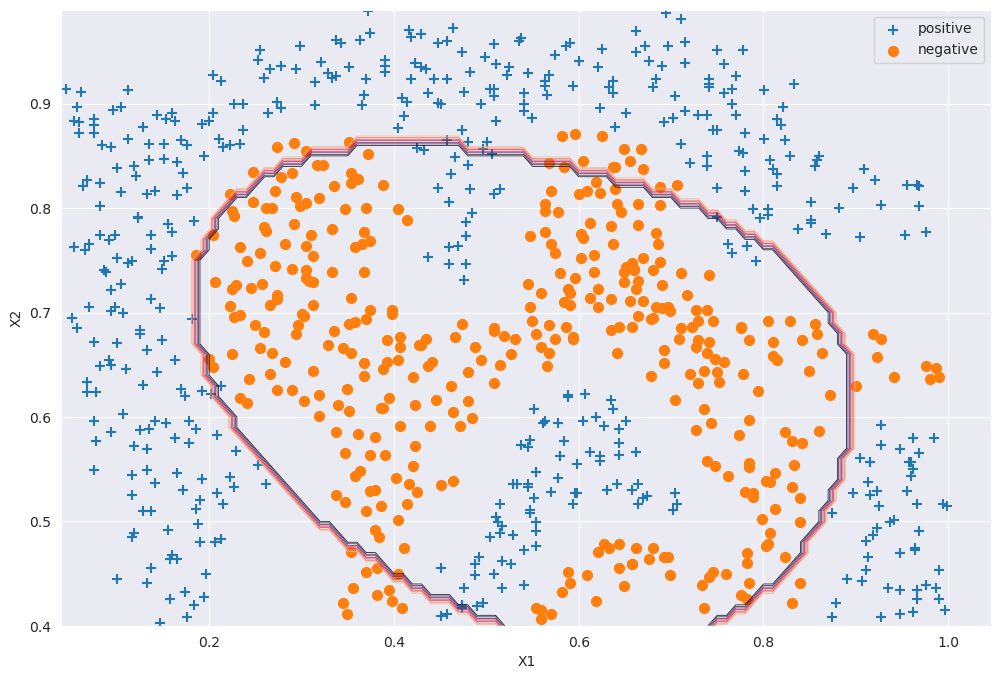

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(loc='best')

# 决策边界，使用等高线表示
x1 = np.arange(0.04, 1, 0.01)
x2 = np.arange(0.4, 1, 0.01)
x1, x2 = np.meshgrid(x1, x2)

# 将网格点转为 DataFrame，带上列名
grid_points = pd.DataFrame({'X1': x1.ravel(), 'X2': x2.ravel()})

# 预测
y_pred = svc1.predict(grid_points)

# 将预测结果恢复为与网格形状一致
y_pred = y_pred.reshape(x1.shape)

plt.contour(x1, x2, y_pred, linewidths=.5)

plt.show()

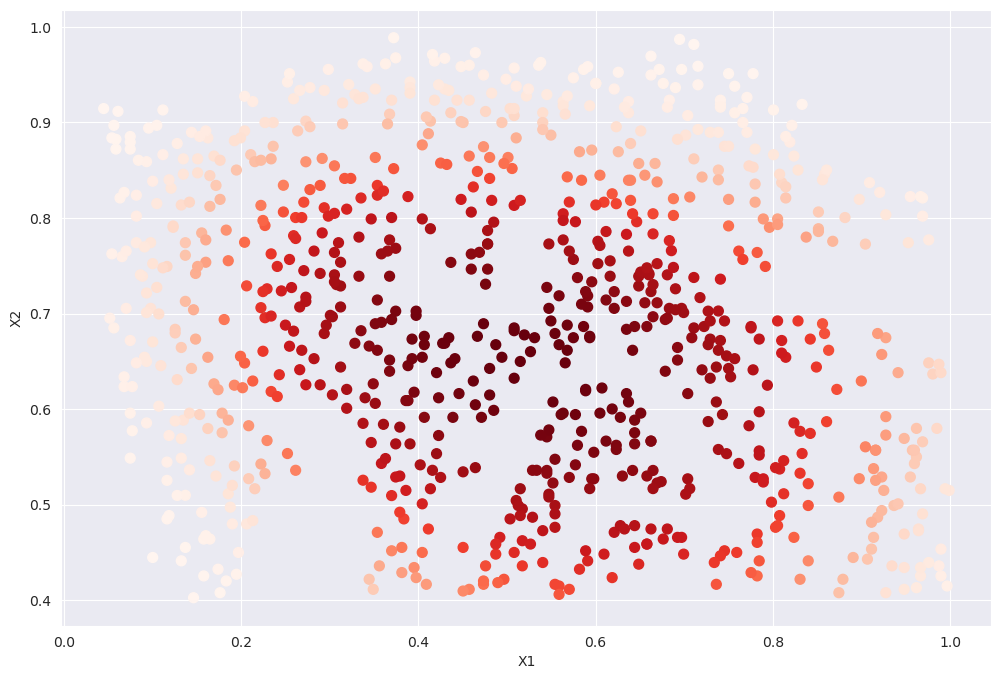

In [30]:
predict_proba = svc1.predict_proba(data[['X1', 'X2']])[:, 0]
# predict_proba = svc1.predict_proba(data[['X1', 'X2']])[:, 1]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X1'], data['X2'], s=50, c=predict_proba, cmap='Reds')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.show()

### Try gamma = 10

$gamma\nearrow,那么sigma\searrow$，gaussian kernel越`“瘦”`，模型越容易`over fitting`

In [31]:
svc2 = sklearn.svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)
svc2.fit(x_train, y_train)
svc2.score(x_train, y_train)

0.9698725376593279

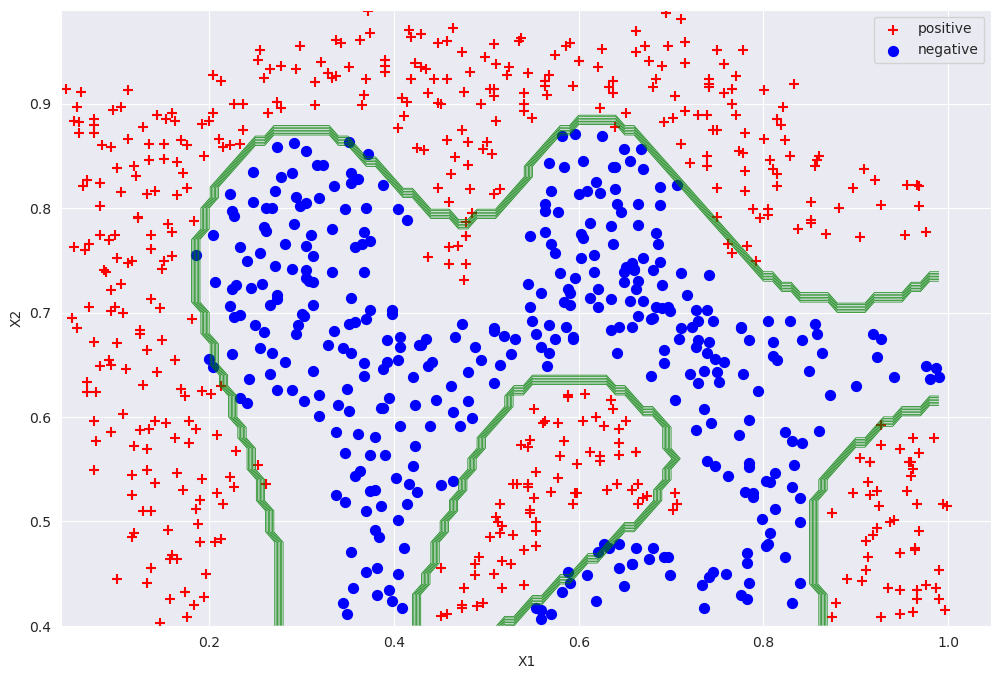

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+', c='r')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# 预测
y_pred = svc2.predict(grid_points)

# 将预测结果恢复为与网格形状一致
y_pred = y_pred.reshape(x1.shape)

plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

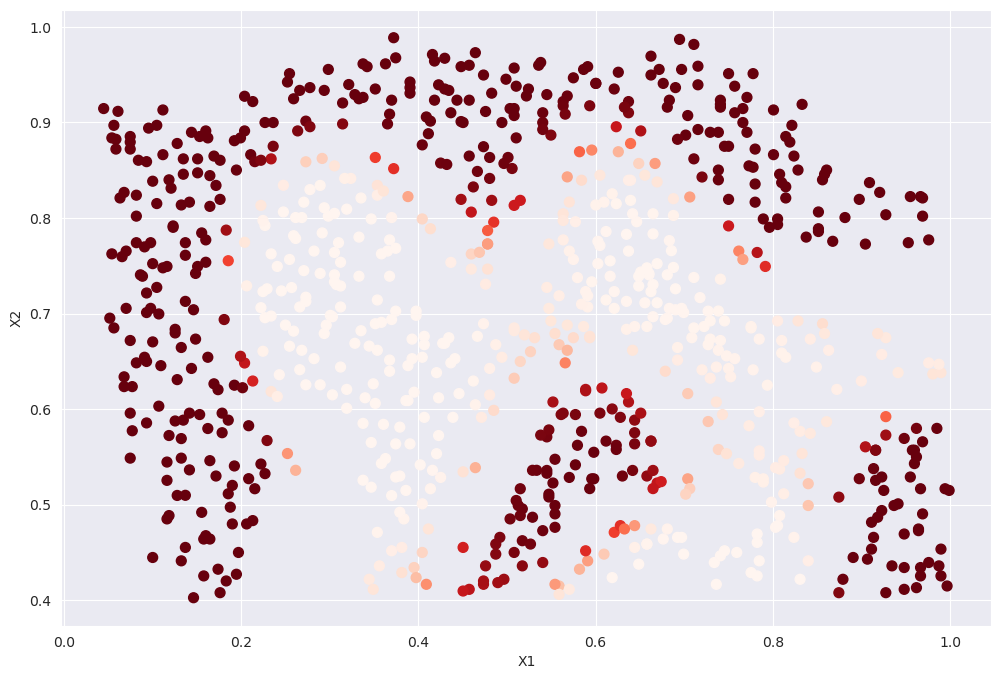

In [33]:
# predict_proba = svc2.predict_proba(data[['X1', 'X2']])[:, 0]
predict_proba = svc2.predict_proba(data[['X1', 'X2']])[:, 1]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X1'], data['X2'], s=50, c=predict_proba, cmap='Reds')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.show()

In [34]:
%reset -f

## Best Parameters

`ex6data3.mat`中有变量X, y, Xval, yval

使用交叉验证集 Xval, yval来决定最佳的$C 和 \sigma$

建议使用[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30] 并且尝试所有的键值对

In [35]:
from utils import *

In [36]:
raw_data = load_data('data/ex6data3.mat')
raw_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [37]:
training = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
training['y'] = raw_data['y']

cv = pd.DataFrame(raw_data['Xval'], columns=['X1', 'X2'])
cv['y'] = raw_data['yval']

In [38]:
training.describe()

,X1,X2,y
count,211.000000,211.000000,211.000000
mean,-0.130246,-0.059743,0.502370
std,0.200516,0.314751,0.501183
min,-0.596774,-0.657895,0.000000
25%,-0.287903,-0.313889,0.000000
50%,-0.130300,-0.052924,1.000000
75%,0.013825,0.192690,1.000000
max,0.297235,0.573392,1.000000


In [39]:
cv.describe()

,X1,X2,y
count,200.000000,200.000000,200.000000
mean,-0.087344,-0.102366,0.435000
std,0.227745,0.399846,0.497001
min,-0.499494,-0.794816,0.000000
25%,-0.282359,-0.472655,0.000000
50%,-0.063430,-0.054261,0.000000
75%,0.122865,0.246273,1.000000
max,0.290919,0.597532,1.000000


### manual grid search for C and $\sigma$

In [40]:
candidate_list = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

combination = [(C, gamma) for C in candidate_list for gamma in candidate_list]

for i in range(6):
    print(combination[i * 8 + i])


(0.01, 0.01)
(0.03, 0.01)
(0.1, 0.01)
(0.3, 0.01)
(1, 0.01)
(3, 0.01)


In [41]:
search_list = []

for C, gamma in combination:
    svc = sklearn.svm.SVC(C=C, gamma=gamma, probability=True)
    svc.fit(training[['X1', 'X2']], training['y'])
    search_list.append(svc.score(cv[['X1', 'X2']], cv['y']))

In [42]:
best_score = search_list[np.argmax(search_list)]
best_param = combination[np.argmax(search_list)]
best_score, best_param

(0.965, (0.3, 100))

In [43]:
best_svc = sklearn.svm.SVC(C=best_param[0], gamma=best_param[1], probability=True)
best_svc.fit(training[['X1', 'X2']], training['y'])
y_pred = best_svc.predict(cv[['X1', 'X2']])

print(sklearn.metrics.classification_report(cv['y'], y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       113
           1       0.95      0.97      0.96        87

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



### sklearn GridSearchCv
[sklearn GridSearchCv](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [44]:
parameters = {'C': candidate_list, 'gamma': candidate_list}
svc = sklearn.svm.SVC()
clf = sklearn.model_selection.GridSearchCV(svc, parameters, n_jobs=-1)
clf.fit(training[['X1', 'X2']], training['y']);

In [45]:
clf.best_params_

{'C': 30, 'gamma': 3}

In [46]:
clf.best_score_

np.float64(0.9194905869324475)

In [47]:
y_pred = clf.predict(cv[['X1', 'X2']])
print(sklearn.metrics.classification_report(cv['y'], y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       113
           1       0.95      0.93      0.94        87

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



The reason for different result is that GridSearch is using part of training data to train because it needs part of data as cv set to get the best parameters, but the manual grid search has additional cv data set.

结果不同的原因是 GridSearch 正在使用部分训练数据进行训练，因为它需要部分数据作为交叉验证数据集来获得最佳参数，但`manual grid search`具有额外的交叉验证数据集。

In [48]:
all_set = res = pd.concat([training, cv], axis=0, ignore_index=True)
all_set.shape

(411, 3)

In [49]:
all_set.head()

,X1,X2,y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


In [50]:
parameters = {'C': candidate_list, 'gamma': candidate_list}
svc = sklearn.svm.SVC()
clf = sklearn.model_selection.GridSearchCV(svc, parameters, n_jobs=-1)
clf.fit(all_set[['X1', 'X2']], all_set['y']);

In [51]:
clf.best_params_

{'C': 1, 'gamma': 10}

In [52]:
clf.best_score_

np.float64(0.9489861886570672)

In [53]:
y_pred = clf.predict(cv[['X1', 'X2']])
print(sklearn.metrics.classification_report(cv['y'], y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       113
           1       0.95      0.97      0.96        87

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



use training data and cv data as GridSearchCV's data set, we can see the score improve.

In [55]:
%reset -f

# Spam Classification

## Preprocessing Emails

- Lower-casing（小写）：The entire email is converted into lower case
- Stripping HTML（剥离HTML）：All HTML tags are removed from the emails. only remains content.
- Normalizing URLs：All URLs are replaced with the text "httpaddr"
- Normalizing Email Addresses：replaced with the "emailaddr"
- Normalizing Numbers： "number"
- Normalizing Dollar："dollar"
- Word Stemming（词干提取）：Words are reduced to their stemmed form. For example, "discount", "discounts", "discounted" and "discounting" are all replaced with "discount". It also may destroy the original meaning of the word.
- Removal of non-words：Non-word and punctuation(标点) have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.

**跳过预处理的步骤，专注在机器学习的任务**

### Vocabulary List

在本次练习中，我们只选择出现频率最高的单词作为考虑的单词集。

统计所有的垃圾邮件中单词出现的频率，提取频率超过100次的单词，得到一个单词列表。

将每个单词替换为列表中对应的编号。

### Extracting Features from Emails

提取特征：每个邮件对应一个n维向量$R^n$，$x_i \in {0, 1}$，如果第i个单词出现，则$x_i=1$，否则$x_i=0$

In [56]:
from utils import *

## Load Data

In [59]:
raw_spam_train = load_data('data/spamTrain.mat')
raw_spam_train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [61]:
raw_spam_test = load_data('data/spamTest.mat')
raw_spam_test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])

In [66]:
X, y = raw_data['X'], raw_data['y'].ravel()
X.shape, y.shape

((4000, 1899), (4000,))

In [67]:
Xtest = raw_spam_test['Xtest']
ytest = raw_spam_test['ytest'].ravel()
Xtest.shape, ytest.shape

((1000, 1899), (1000,))

## Training SVM for Spam Classification

In [69]:
svc = sklearn.svm.SVC()
svc.fit(X, y);

In [70]:
svc.score(Xtest, ytest)

0.987

In [73]:
pred = svc.predict(Xtest)
print(sklearn.metrics.classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       692
           1       0.99      0.97      0.98       308

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [74]:
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))

Training accuracy = 99.32%


In [75]:
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))

Test accuracy = 98.7%
